In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sc
import uncertainties as unc
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

read in data

In [2]:
def read_in(path_to_file):
    counts = np.genfromtxt(path_to_file, skip_header = 12,skip_footer = 14, unpack = True)
    df = pd.DataFrame({"channel": np.arange(0,len(counts)), "counts": counts})
    return df

In [3]:
df_Ba = read_in("data/133Ba.Spe")
df_Cs = read_in("data/137Cs.Spe")
df_Eu = read_in("data/152Eu.Spe")
df_U = read_in("data/Uran.Spe")

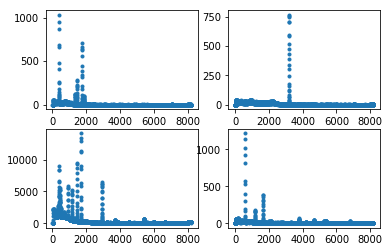

In [4]:
fig,axes = plt.subplots(2,2)
ax_list = axes.flatten()
for ax,df in zip(ax_list.flat,[df_Ba,df_Cs,df_U,df_Eu]):
    ax.scatter(df["channel"], df["counts"], marker = ".")


# Kalibrierung mittels 152Eu


In [5]:
Eu_energy, Eu_prop = np.genfromtxt("data/Eu_gamma.txt", skip_header = 1, unpack = True)

In [6]:
peaks = find_peaks(df_Eu["counts"],prominence = 30)

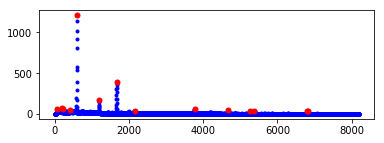

In [22]:
fig,ax = plt.subplots(figsize = (6,2))
ax.plot(df_Eu["channel"], df_Eu["counts"], linestyle = "", marker = ".", color = "blue")
ax.plot(peaks[0], df_Eu["counts"][peaks[0]], linestyle = "", marker= "o", markersize = 5, color = "red")


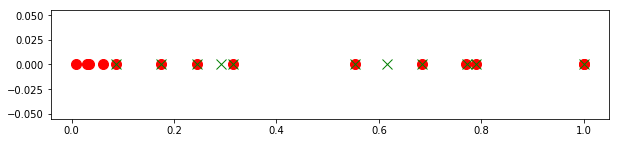

In [14]:
fig,ax = plt.subplots(figsize = (10,2))
ax.plot(peaks[0]/max(peaks[0]), np.zeros(len(peaks[0])), linestyle = "", marker = "o", markersize = 10, color = "red")
ax.plot(Eu_energy/max(Eu_energy), np.zeros(len(Eu_energy)), linestyle = "", marker = "x", markersize = 10, color = "green")


In [9]:
Kalibration = pd.DataFrame({"channel": np.take(peaks[0],[4,5,6,7,8,9,10,11,12]) , "energy": np.take(Eu_energy,[0,1,2,4,5,7,8,9,10]) })
Kalibration["peak_height"]=df_Eu["counts"][Kalibration["channel"]].values


In [17]:
def lin_reg(x,m,b):
    return m*x + b
params_lin_reg, cov = curve_fit(lin_reg, Kalibration["channel"], Kalibration["energy"])
errors_lin_reg = np.sqrt(np.diag(cov))
x_reg = np.linspace(0,7000,1000)

def channel_kal(channels):
    return params_lin_reg[0]*channels + params_lin_reg[1]

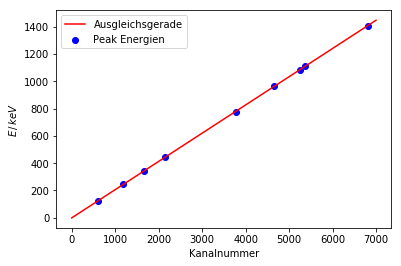

In [18]:
fig,ax = plt.subplots()
ax.scatter(Kalibration["channel"], Kalibration["energy"], color = "blue", label = r"Peak Energien" )
ax.plot(x_reg,lin_reg(x_reg, *params_lin_reg), color = "red", label = r"Ausgleichsgerade")
ax.set_ylabel(r"$E \, / \,  keV$")
ax.set_xlabel(r"Kanalnummer")
ax.legend()

# Aktivität 152Eu##

Abstand Detektor Quelle = 6cm

In [18]:
A0 = ufloat(4130,60)
def act(t, T_half,A0 = ufloat(4130,60)):
    return A0 * np.exp(- t * np.log(2) / T_half)

NameError: name 'ufloat' is not defined

In [14]:
import datetime
days_gone = datetime.date(year = 2019, month = 11, day =7) - datetime.date(year = 2000, month = 10, day = 1)
seconds_gone = days_gone.total_seconds()
seconds_gone


602726400.0